## Demo and testing notebook

This notebook runs through a lot of the features of lazychart and is also useful for me to check things during development.

### Until this is a proper package, add src to path

In [11]:
# ensure notebook can import from local sticky directory
import sys
sys.path.append("D:/Projects/lazychart/src")

### Object oriented vs Functional appraoch

There are two ways to use this package:

1. Object oriented approach. You instantiate one or more instances of the StickyPlotter class and use them to control your plotting.

```python
# object oriented approach
from lazychart import ChartMonkey
cm = ChartMonkey()
cm.bar(data=df, x='x_col')
```

2. Functional approach. You call the package functions which are defined in the \_\_init__.py file which instantiates the StickyPlotter class and passes your requests through for it to handle.

```python
# functional approach
from lazychart import bar
bar(data=df, x='x_col')
```

In [12]:
from lazychart import ChartMonkey
cm = ChartMonkey()

### Generate some data

In [13]:
# object oriented approach
df = cm.example_data(n=1461)
display(df.head())

# most charts will use this same data - so make it sticky
cm.sticky(data=df)

,date,user,sleep_hours,steps,alcohol,work_stress,nutrition,score,predicted_emotion,month,weekday
0,2021-08-23 23:37:01.836223,user39,6.651987,5688.783716,2,2.313749,5.068314,8.593897,Happy,2021-08,Monday
1,2021-08-24 23:37:01.836223,user29,7.198558,6942.937849,3,4.208799,8.146145,9.696701,Happy,2021-08,Tuesday
2,2021-08-25 23:37:01.836223,user15,5.565635,4095.907190,0,9.476706,7.504157,3.874251,Happy,2021-08,Wednesday
3,2021-08-26 23:37:01.836223,user43,7.581022,4956.492933,3,3.122092,10.000000,7.801262,Happy,2021-08,Thursday
4,2021-08-27 23:37:01.836223,user8,5.475985,4373.712913,2,3.138230,7.752243,7.591253,Happy,2021-08,Friday


data generation notes/ideas
* try to balance out the predicted_emotion class, currently 100% happy
* make people sleep more on the weekends

library ideas
* custom sort order as list of values e.g. ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
* make the sort asc/desc default based on the sort type (values descending, labels ascending)

### Legends

My goodness it took a long time to get these working. Features:
* 'right' and 'bottom' options work similar to Google Sheets or other "plug and play" experiences
* number of rows and columns is determined dynamically to avoid legends being taller/wider than the figure
* figure size is dynamically increased, so adding many categories just results in a big figure/legend rather than a squished data chart
* long legend labels wrap automatically if on the 'right', to avoid taking up more than 30% of the figure width

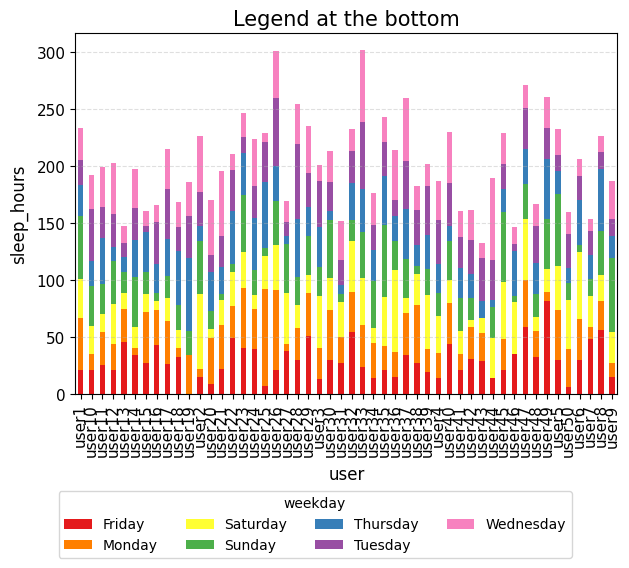

In [14]:
# legend on bottom
cm.bar(x='user', y='sleep_hours', group_by='weekday',
       title='Legend at the bottom', legend='bottom')

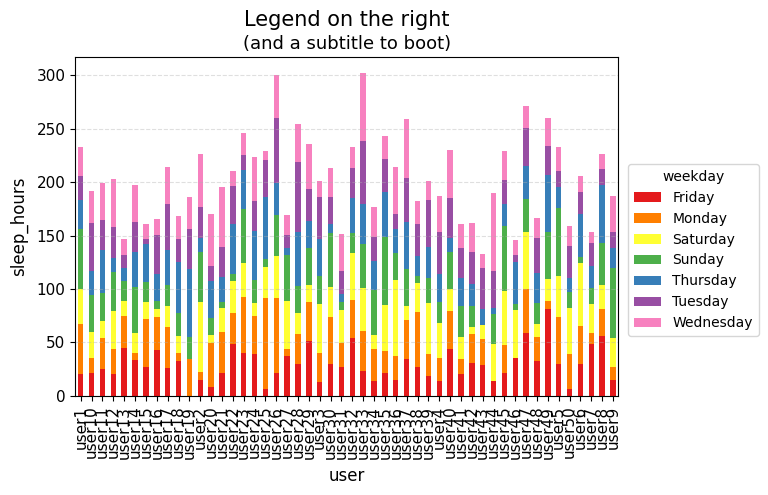

In [15]:
# legend on the right
cm.bar(x='user', y='sleep_hours', group_by='weekday',
       title='Legend on the right', legend='right', subtitle='(and a subtitle to boot)')

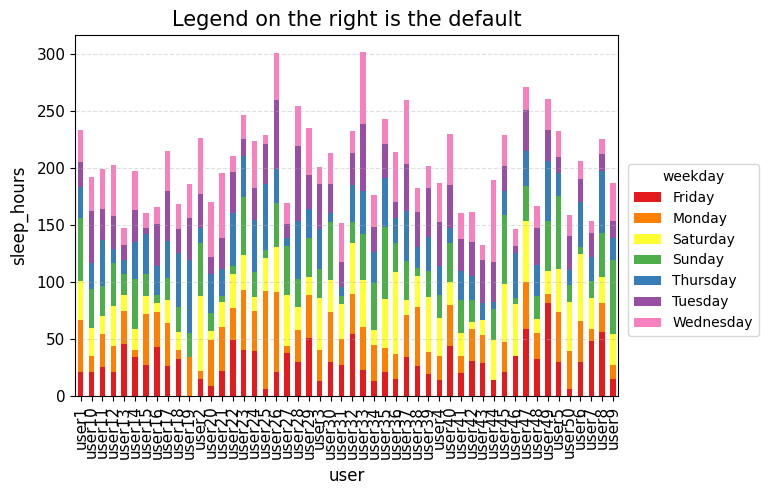

In [16]:
# this is also the default
cm.bar(x='user', y='sleep_hours', group_by='weekday',
       title='Legend on the right is the default')

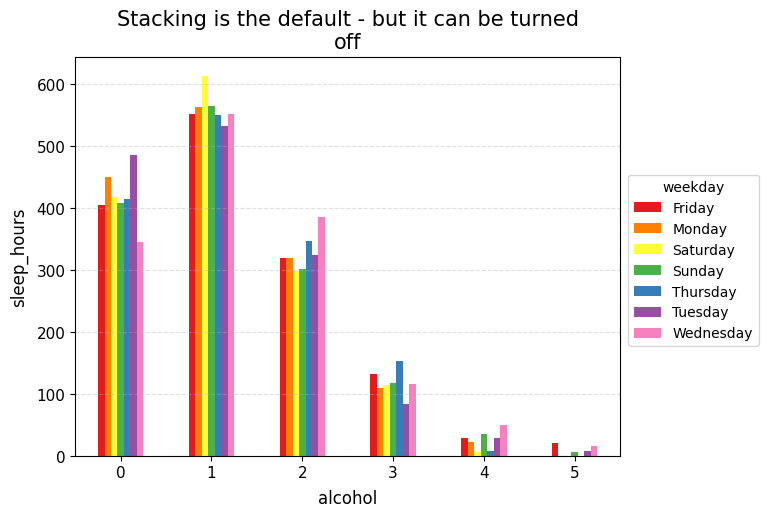

In [17]:
# stacking is also the default
cm.bar(x='alcohol', y='sleep_hours', group_by='weekday',
       title='Stacking is the default - but it can be turned off', stacking='none')

In [18]:
### Long legend labels

weekday_mapping = {
    "Monday":    "Monday is the first day",
    "Tuesday":   "Tuesday is the second day",
    "Wednesday": "Wednesday is the third day",
    "Thursday":  "Thursday is the fourth day",
    "Friday":    "Friday is the fifth day",
    "Saturday":  "Saturday is the sixth day",
    "Sunday":    "Sunday is the seventh day"
}

# Apply mapping to create longer names
df['weekday_long'] = df['weekday'].map(weekday_mapping)

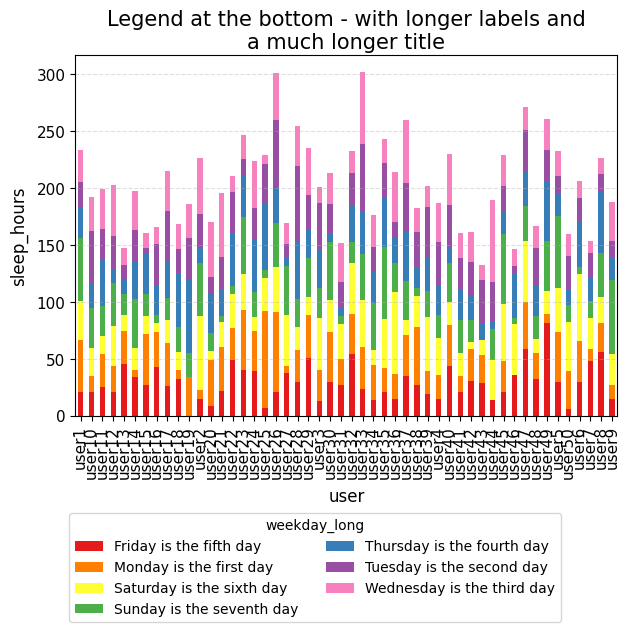

In [19]:
# legend on bottom
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday_long', title='Legend at the bottom - with longer labels and a much longer title', legend='bottom')

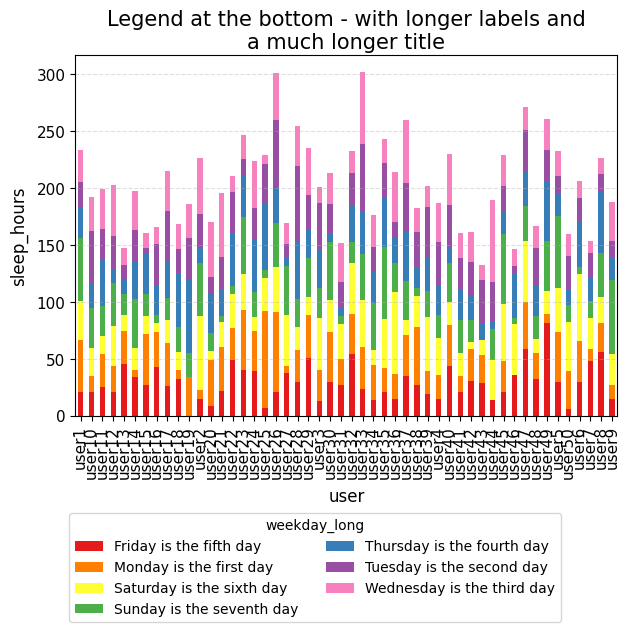

In [20]:
# legend on bottom
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday_long', title='Legend at the bottom - with longer labels and a much longer title', legend='bottom')

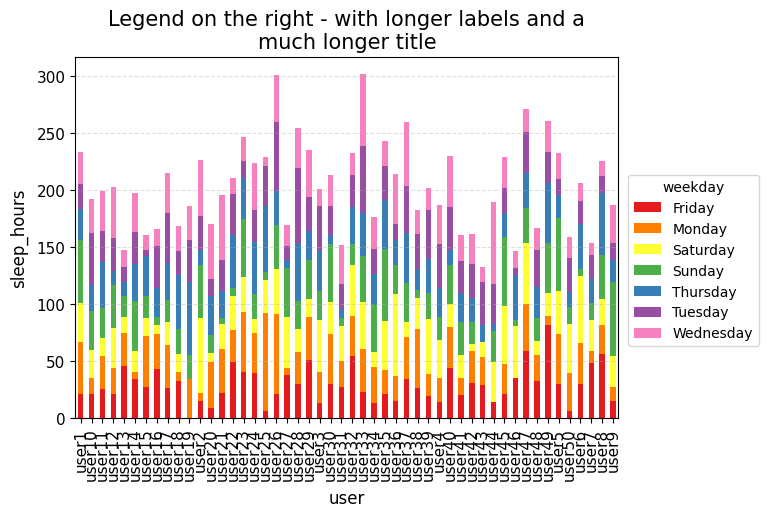

In [21]:
# legend on the right
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', 
       title='Legend on the right - with longer labels and a much longer title', legend='right')

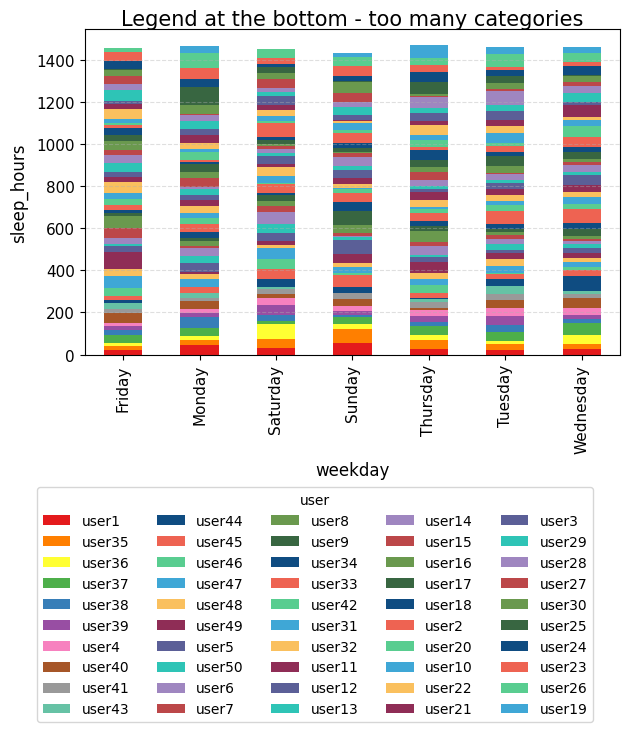

In [22]:
# legend on bottom
cm.bar(x='weekday', y='sleep_hours', group_by='user',
       title='Legend at the bottom - too many categories', legend='bottom')

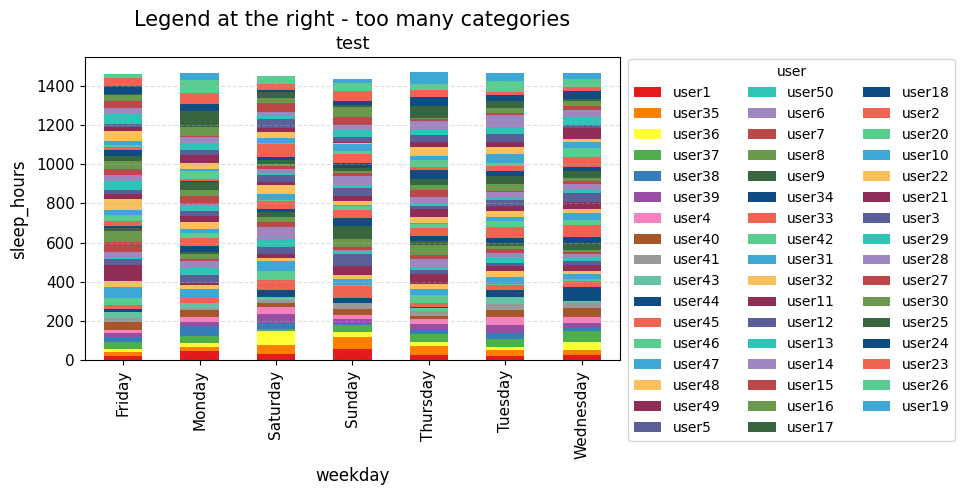

In [23]:
# legend on the right
cm.bar(x='weekday', y='sleep_hours', group_by='user', 
       title='Legend at the right - too many categories', subtitle='test', legend='right')

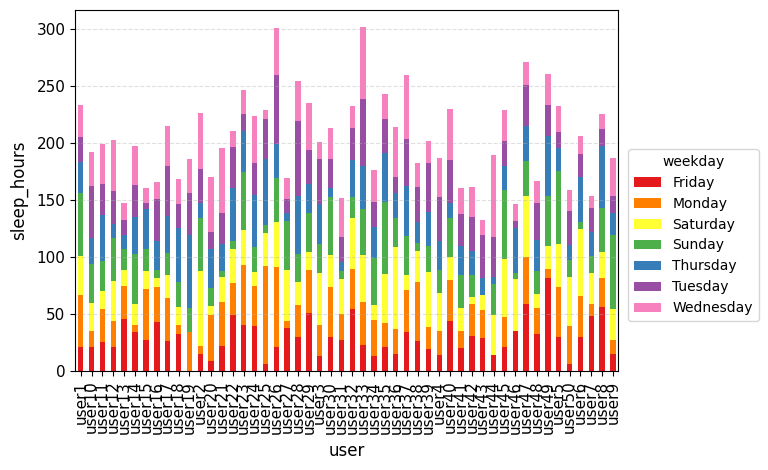

In [24]:
# Still works without a title
cm.bar(x='user', y='sleep_hours', group_by='weekday', legend='right')

### Automatic aggregation on the x axis

When a time variable is used on the x axis, the `x_period` parameter can be used to automatically group up the data into common time bands.

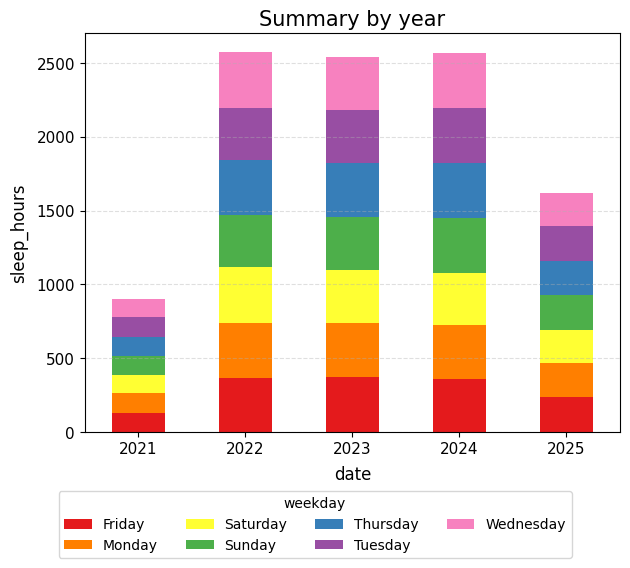

In [25]:
cm.bar(x='date', x_period='year', y='sleep_hours', group_by='weekday', 
       title='Summary by year', legend='bottom')

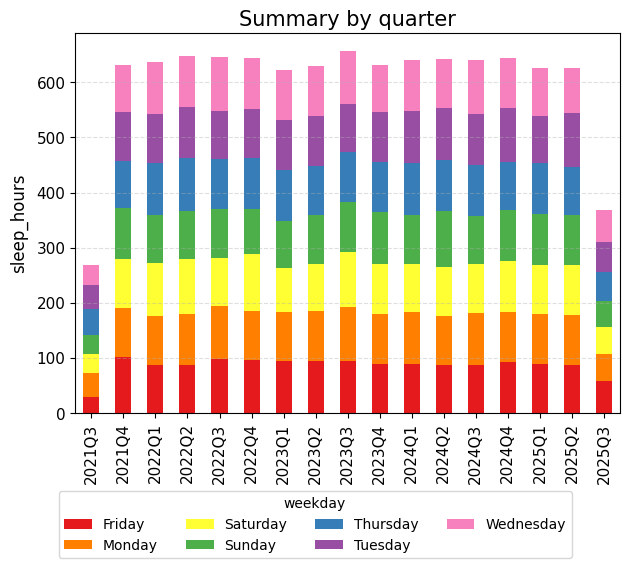

In [26]:
cm.bar(x='date', x_period='quarter', y='sleep_hours', group_by='weekday',
       title='Summary by quarter', legend='bottom', x_label='') # also shows how you can remove the default x_label value with ''

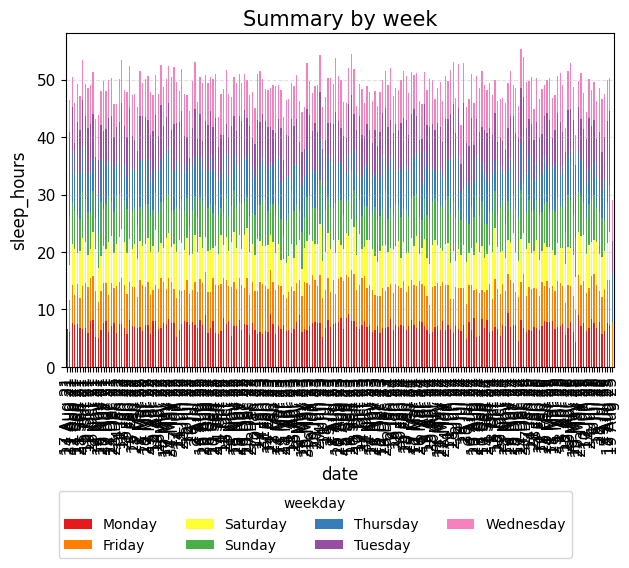

In [27]:
cm.bar(x='date', x_period='week', y='sleep_hours', group_by='weekday',
       title='Summary by week', legend='bottom')

note x_period='day' is also possible but not appropriate for this dataset

### Custom sort order

In addition to sorting x or group_by using 'labels' or 'values' and either ascending or descending, you can pass a custom sort order e.g. for categories that are ordinal but where you don't want to have to adjust the labels to have a numeric prefix just to get the sorting correct.

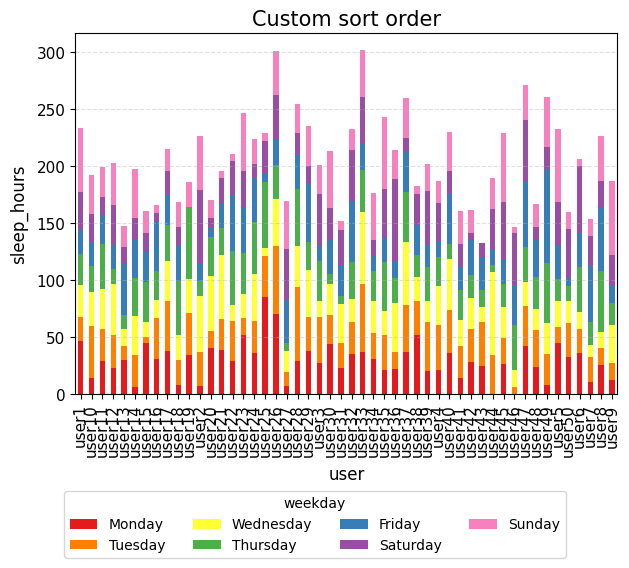

In [28]:
cm.bar(x='user', y='sleep_hours', group_by='weekday',
       title='Custom sort order', legend='bottom',
       sort_group_by=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

### Sticky arguments

These are turned off by default, but you can call `sticky()` to set arguments or use `sticky=True` to have all arguments within a chart call be remembered from one chart to the next

To reset this, call `sticky()` with no arguments.

In [29]:
# you can set the parameters in advanced
cm.sticky() # reset
cm.sticky(data=df, x='user', y='sleep_hours', group_by='weekday', 
          sort_x='label', sort_x_ascending=True) # add new arguments

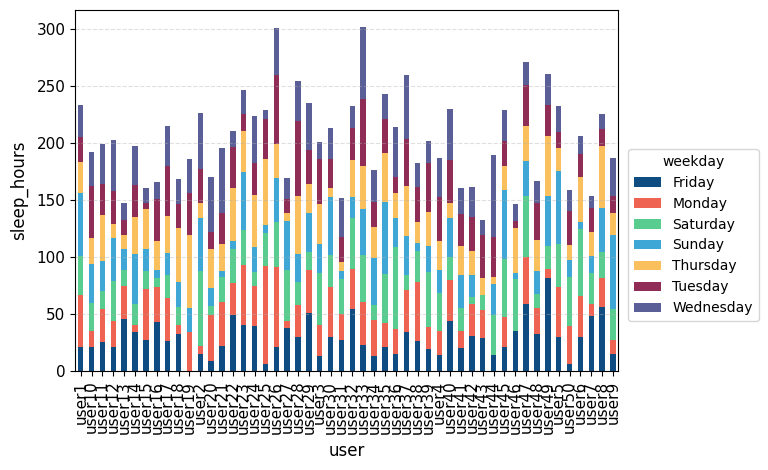

In [30]:
# all arguments passed above are being remembered
cm.bar()

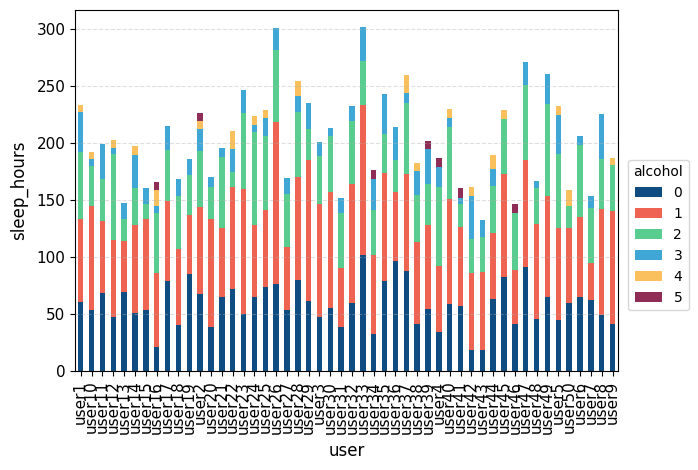

In [31]:
# no need to pass data, x, y etc. it gets remembred. can also use sticky=True to remember subsequent adjustments to the parameters.
cm.bar(group_by='alcohol', sort_group_by='label', sticky=True)

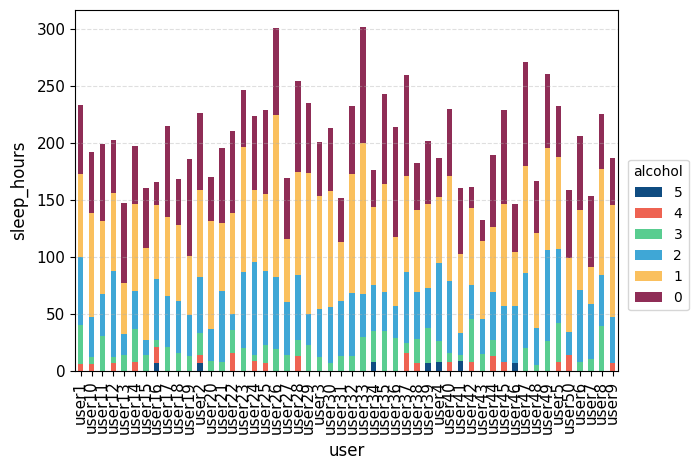

In [32]:
cm.bar(sort_group_by_ascending=False)

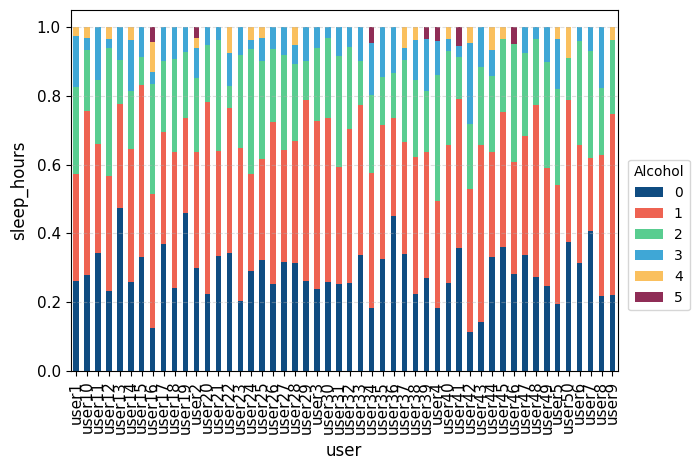

In [33]:
cm.bar(stacking='proportion', legend_label='Alcohol')

In [34]:
# call with no parameters to reset the sticky arguments when done
cm.sticky()
cm.sticky(data=df)

### Custom palettes

The palette can be set using a hex color list, or the 'rainbow' and 'colorblind' presets. 

This can be done when you instantiate the ChartMonkey object using `palette` or afterwards using e.g. `cm.apply_palette(palette='colorblind')`.

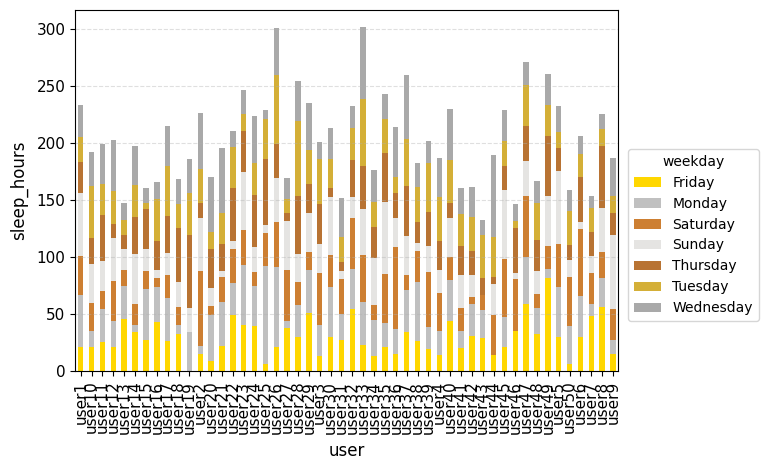

In [35]:
METALLIC_PALETTE = [
    '#FFD700',  # Gold
    '#C0C0C0',  # Silver
    '#CD7F32',  # Bronze
    '#E5E4E2',  # Platinum
    '#B87333',  # Copper
    '#D4AF37',  # Metallic Gold (Deep)
    '#A9A9A9',  # Gunmetal Gray
    '#B0C4DE',  # Steel Blue
    '#DA8A67',  # Rose Gold
    '#8C7853'   # Brass
]

# set palette when instantiating the class, using a list of hex values
custom_cm = ChartMonkey(palette=METALLIC_PALETTE)
custom_cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday')

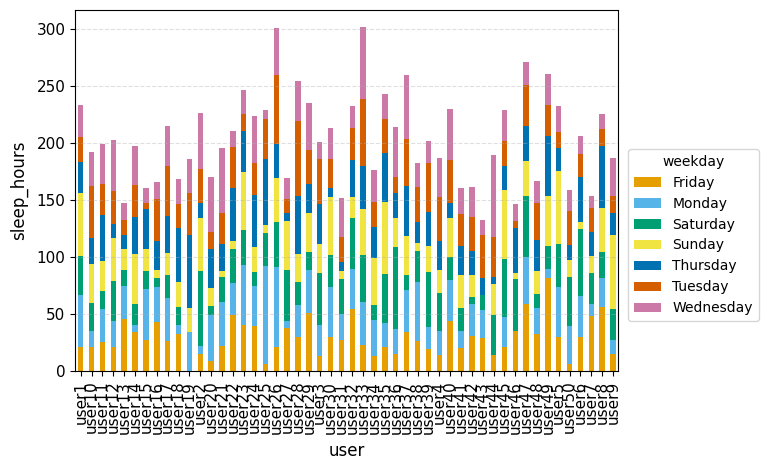

In [36]:
# set palette using the set_palette method
custom_cm.set_palette(palette='colorblind')
custom_cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday')

You can also pass a chart-specific palette

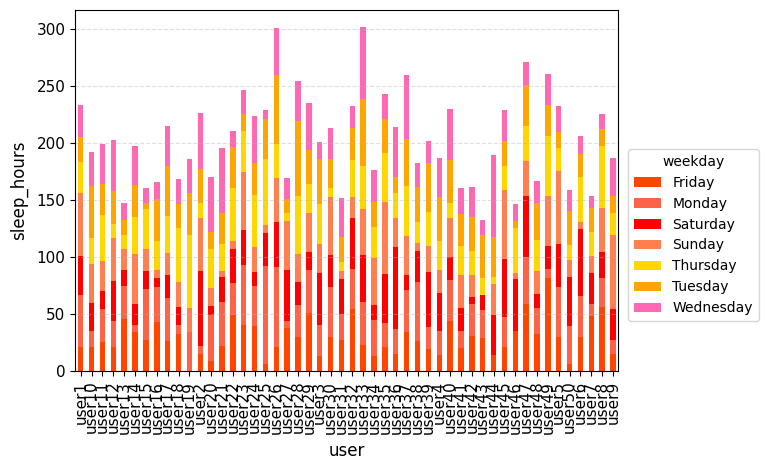

In [37]:
HOT_PALETTE = [
    '#FF4500',  # Orange Red
    '#FF6347',  # Tomato
    '#FF0000',  # Red
    '#FF7F50',  # Coral
    '#FFD700',  # Bright Yellow
    '#FFA500',  # Orange
    '#FF69B4',  # Hot Pink
    '#FF1493',  # Deep Pink
    '#8B0000',  # Dark Red
    '#4B0000'   # Blackened Brown
]

custom_cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', palette=HOT_PALETTE)

You can also use a label-linked palette lookup. This ensures the same colours are used for the same categories in different charts, even if the data changes, without the need to wrangle and sort. This will be combined with any fixed palette (including presets) to "fill in the gaps", with a "fallback" palette being used after that.

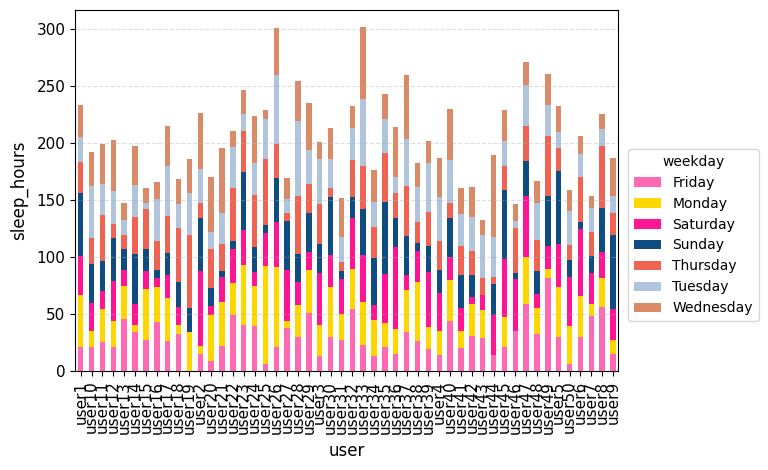

In [38]:
# These days should always have these colours
palette_map = {
    'Monday': METALLIC_PALETTE[0],    # Gold 
    'Tuesday': METALLIC_PALETTE[7],   # Steel Blue
    'Wednesday': METALLIC_PALETTE[8]  # Rose Gold
}

# The next two days on the list that aren't in the above dict will be pink
fixed_palette = [HOT_PALETTE[6], HOT_PALETTE[7]]   # shades of pink

custom_cm.bar(data=df,
              x='user', y='sleep_hours', group_by='weekday',
              palette=fixed_palette, palette_map=palette_map)

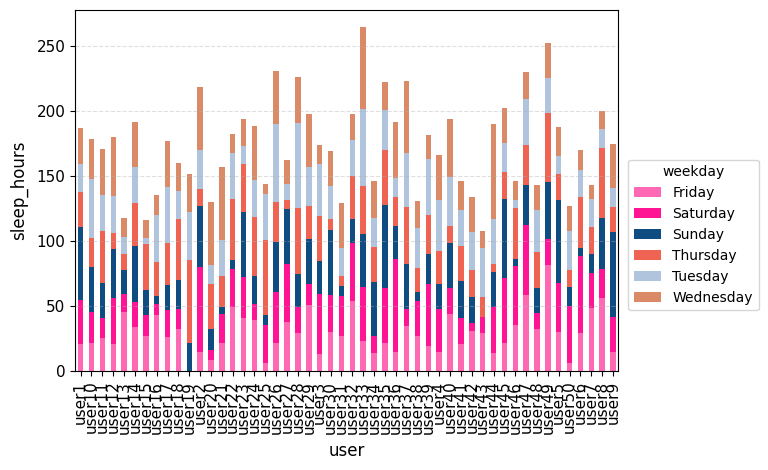

In [39]:
custom_cm.bar(data=df[df['weekday'] != 'Monday'],
              x='user', y='sleep_hours', group_by='weekday',
              palette=fixed_palette, palette_map=palette_map,
              sort_group_by_ascending=True)

### Frequency charts

If you don't pass a value to sum based on, you will get a count by default

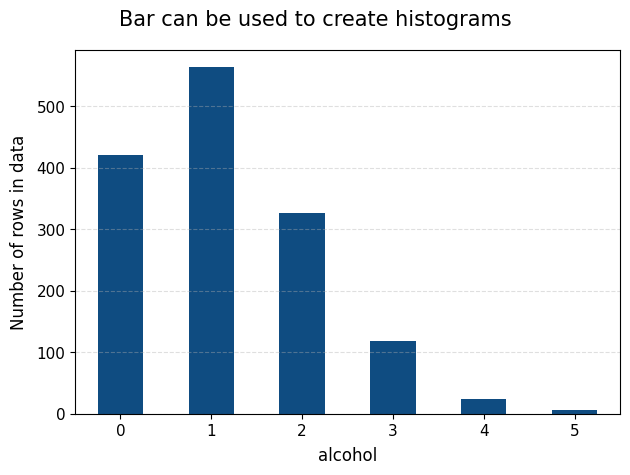

In [40]:
cm.bar(x='alcohol', title='Bar can be used to create histograms')

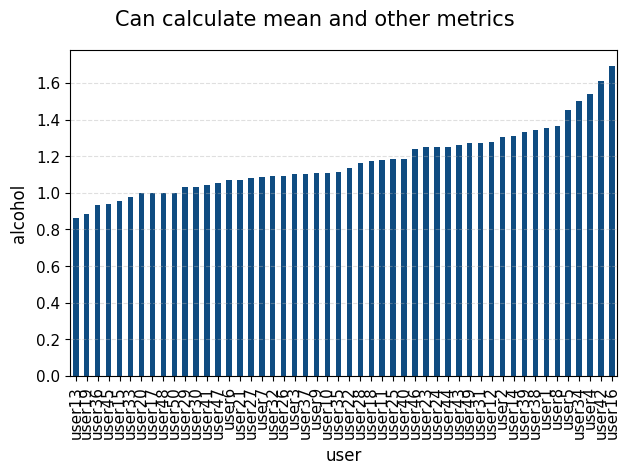

In [41]:
# TODO - figure out why sort_x='value' here doesn't seem to be working
# TODO - when applying aggfunc add this to the legend entry i.e. this one should be mean(alcohol), similar on the y axis
cm.bar(x='user', y='alcohol', title='Can calculate mean and other metrics', aggfunc='mean', sort_x='value')

### Benchmark / Target lines

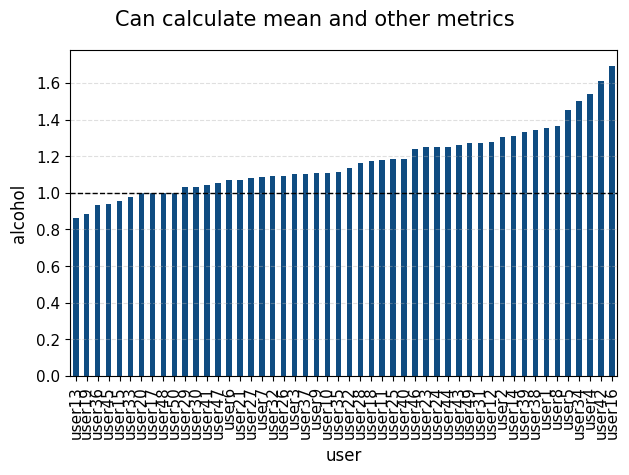

In [42]:
cm.bar(x='user', y='alcohol', title='Can calculate mean and other metrics', aggfunc='mean', sort_x='value',
       target_y = 1.0)

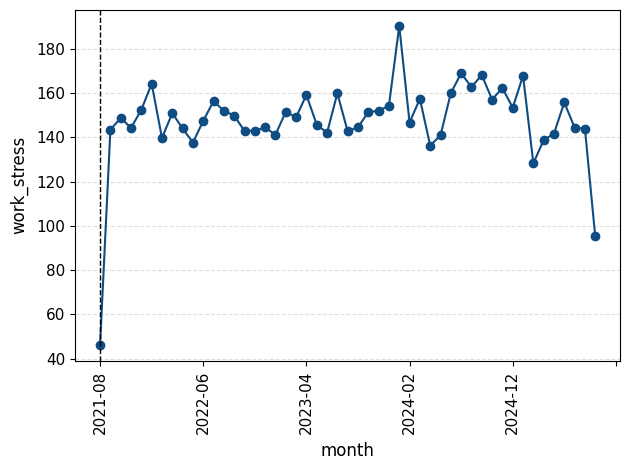

In [43]:
# TODO: figure out how to handle x targets with categorical x values
cm.line(x='month', y='work_stress', target_x='01-Jan-2023')

### Different font presets

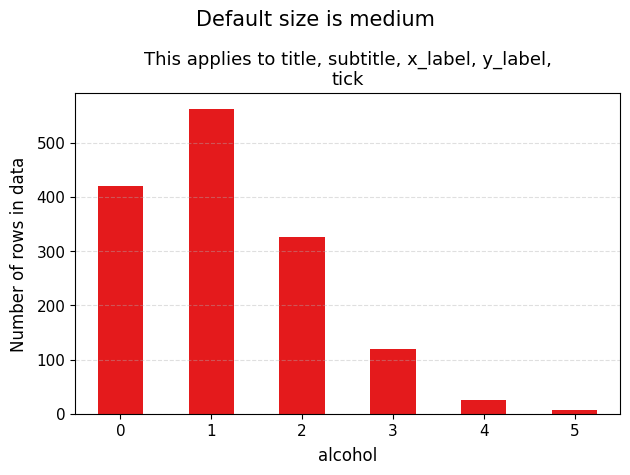

In [43]:
cm.bar(x='alcohol', title='Default size is medium', subtitle='This applies to title, subtitle, x_label, y_label, tick')

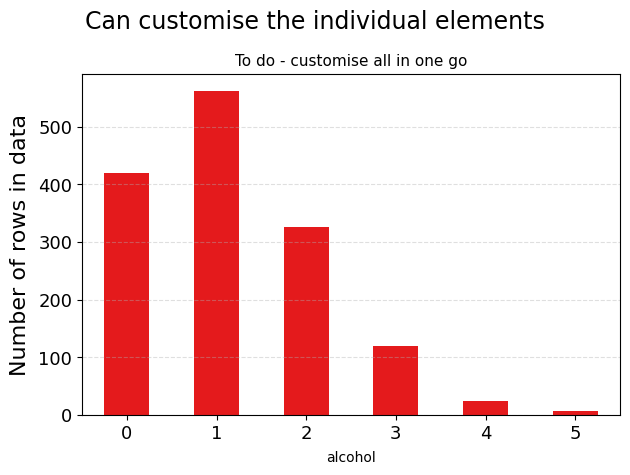

In [44]:
cm.bar(x='alcohol', title='Can customise the individual elements', subtitle='To do - customise all in one go',
       title_size='large', subtitle_size='small', x_label_size='small', y_label_size='x-large', tick_size='large')

### Label remapping

We should be able to remap labels and this shouldn't adversely impact sorting

### Pie charts

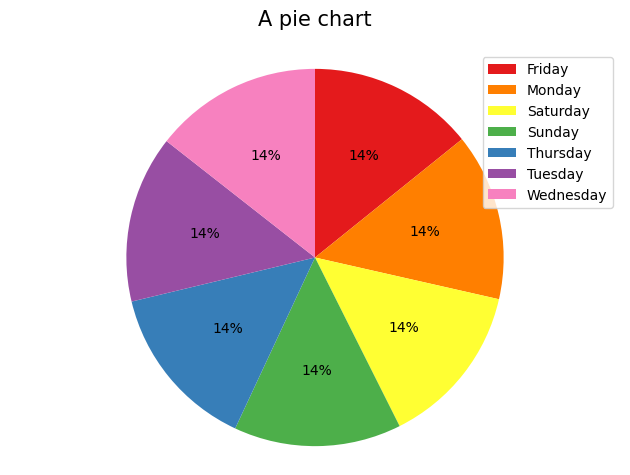

In [45]:
cm.pie(values='sleep_hours', names='weekday', title='A pie chart')

### Line charts

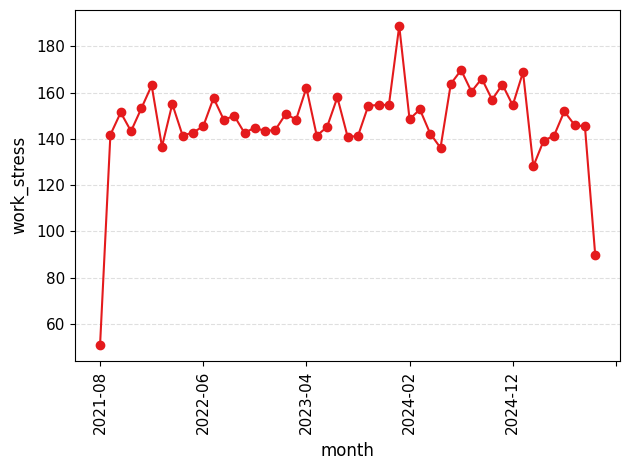

In [46]:
# TODO: figure out why we have no legend here
cm.line(x='month', y='work_stress')

# Early stuff - need to revisit

### Post processing

The default behaviour is to show the plot and return None to suppress other cell outputs. Pass show_plot=False to instead return fig, ax for post processing.

In [47]:
if False:
    fig, ax = sticky.hist(data=df, x='work_stress', show_plot=False)

    # Example: Add a custom annotation to the plot
    ax.annotate(
        'Peak stress here!',
        xy=(9, 25), # point to annotate (arrow tip), in data coordinates
        xytext=(9, 30), # location of the annotation text, in data coordinates
        arrowprops=dict(facecolor='red', shrink=0.05), # arrow style
        fontsize=12, color='red' # text style
    )

    # Example: Add a watermark
    fig.text(0.8, 0.9, 'Confidential', ha='center', va='center', fontsize=16, color='gray', alpha=0.5)

    # Example: Save the figure with a custom DPI and tight bounding box
    fig.savefig('demo_save.png', dpi=300, bbox_inches='tight')